# DQL - RM game with DCP


In [42]:
%load_ext autoreload
%autoreload 2
import gym
import sys
from deep_q_learning_keras_DCP import DQNAgent, get_true_Q_table, init_with_V, init_target_network_with_true_Q_table, train
from visualization_and_metrics import visualisation_value_RM
from q_learning import q_to_v


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Environment

In [28]:
data_collection_points = 4
micro_times = 3
capacity = 4
actions = tuple(k for k in range(50, 231, 50))
alpha = 0.4
lamb = 0.2

env = gym.make('gym_RMDCP:RMDCP-v0', data_collection_points=data_collection_points, capacity=capacity,
                   micro_times=micro_times, actions=actions, alpha=alpha, lamb=lamb)
state_size = len(env.observation_space.spaces)
action_size = env.action_space.n


Learning parameters 

In [29]:
batch_size = 64
nb_episodes = 100


Creation of the agent

In [30]:
agent = DQNAgent(state_size, action_size) 


True Q-table - computed using dynamic programming

In [31]:
true_Q_table, true_policy = get_true_Q_table(env, agent.gamma)
true_V = q_to_v(env, true_Q_table)


Visualization of the true values 

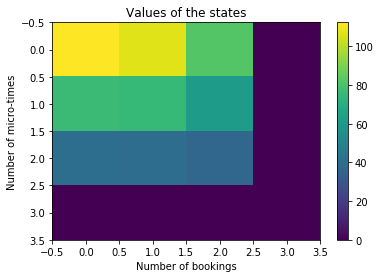

In [32]:
visualisation_value_RM(true_V, env.T, env.C)


We first use directly the true Q-table to train the network

Average reward of the true policy over 10000 episodes  : 119.385


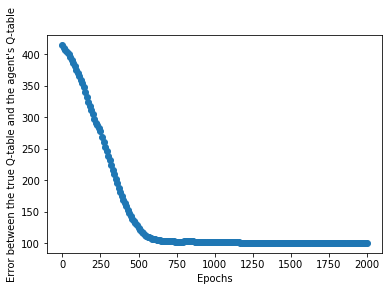

In [39]:
agent = DQNAgent(state_size, action_size) 
init_with_V(agent, env, batch_size)


We then use the true Q-table as the agent's target network. 

Average reward of the true policy over 10000 episodes  : 121.62


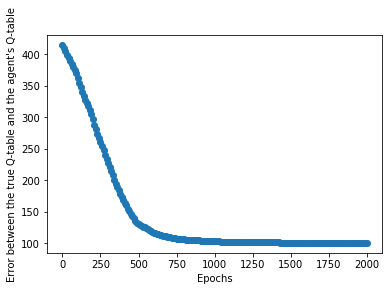

In [24]:
agent = DQNAgent(state_size, action_size)
init_target_network_with_true_Q_table(agent, env, batch_size)


For each (state, action, reward, next state, done) of the minibatch we do:

In [40]:
# q_values = self.target_model.predict(state)

